In this notebook we simulate the distribution of family sizes according to WF and coalescent

In [1]:
%matplotlib inline 
import msprime
from matplotlib import pyplot as plt
import numpy as np

In [3]:
popsize = 1000000
endtime = 1+1e-8 #we want to make sure that Wright-Fisher stops just after the generation


tsWF = msprime.simulate(sample_size = popsize, Ne=popsize/2, 
                        end_time = endtime, model = msprime.DiscreteTimeWrightFisher(popsize/2)) 
tsCoal = msprime.simulate(sample_size = popsize, Ne=popsize/2, end_time = endtime)

treeWF = tsWF.first() 
treeCoal = tsCoal.first() 


In [4]:
fam_sizesWF = [treeWF.get_num_leaves(parent) for parent in treeWF.roots]
fam_sizesCoal = [treeCoal.get_num_leaves(parent) for parent in treeCoal.roots]
print("number of remaining lineages, WF :", len(fam_sizesWF) )
print("number of remaining lineages, Coal :", len(fam_sizesCoal) )
print("prop of no kids, WF :", 1- len(fam_sizesWF)/popsize )
print("prop of no kids, Coal :", 1- len(fam_sizesCoal)/popsize )
print("expectation under WF", (1-1/popsize)**popsize )



number of remaining lineages, WF : 632172
number of remaining lineages, Coal : 666503
prop of no kids, WF : 0.36782800000000004
prop of no kids, Coal : 0.33349700000000004
expectation under WF 0.36787925722106646


Note the number of lineages in WF is smaller than in Coal, as observed in Bhaskar, Clark, and Song. Now consider the distribution of family sizes:

Text(0, 0.5, 'number of families')

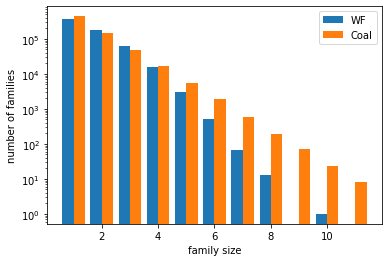

In [5]:
hists = plt.hist([fam_sizesWF,fam_sizesCoal],bins = np.arange(0.5,12,1),label = ("WF","Coal"),log = True)
histWF = hists[0][0]
histCoal = hists[0][1]
plt.legend(loc = "upper right")
plt.xlabel("family size")
plt.ylabel("number of families")

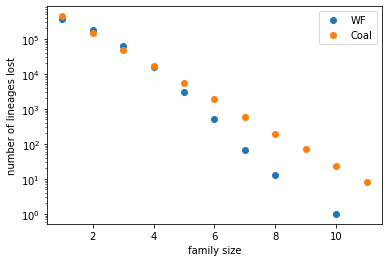

In [6]:
bins = (hists[1]+0.5)[:-1]
plt.plot(bins, histWF,'o',label = "WF")
plt.plot(bins, histCoal,'o',label = "Coal")
plt.yscale('log')
plt.xlabel("family size")
plt.ylabel("number of lineages lost")
plt.legend(loc = "upper right")

The number of lineages lost to each family size.




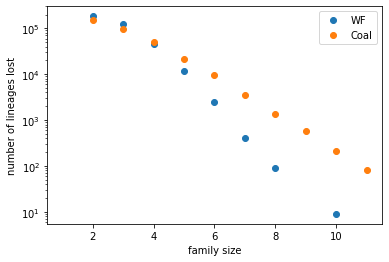

In [7]:
bins = (hists[1]+0.5)[:-1]
plt.plot(bins, (bins-1)*histWF,'o',label = "WF")
plt.plot(bins, (bins-1)*histCoal,'o',label = "Coal")
plt.yscale('log')
plt.xlabel("family size")
plt.ylabel("number of lineages lost")
plt.legend(loc = "upper right")


We have the unnormalized truncated distribution of family sizes (i.e., we don't have families of size zero). But that can easily be fixed!

In [8]:
nokidsWF = popsize - np.sum(histWF)
nokidsCoal = popsize - np.sum(histCoal)

In [9]:
fullhistWF = np.array([nokidsWF]+list(histWF))/popsize
fullhistCoal = np.array([nokidsCoal]+list(histCoal))/popsize
fullbins = hists[1]-0.5

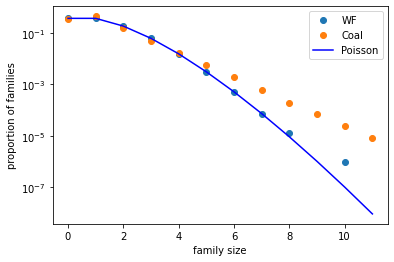

In [19]:
import scipy.special
from scipy.special import factorial
plt.plot(fullbins, fullhistWF,'o',label = "WF")
plt.plot(fullbins, fullhistCoal,'o',label = "Coal")
plt.plot(fullbins,np.exp(-1)/factorial(fullbins),label = "Poisson",color = 'b')
p=0.7
plt.yscale('log')
plt.xlabel("family size")
plt.ylabel("proportion of families")
plt.legend(loc = "upper right")

In [20]:
np.sum(fullhistWF)
np.sum(fullhistCoal)

1.0

We would like to compute the mean and variance of each family size distribution. Wright-Fisher should be 1 for both if we include 0 family sizes. We are especially interested in the ration of variance to mean, as this can be used as a diagnostic for non-Wright-Fisher behavior. Let us first compute this straight from the simulations, which will give us the ratio for families that have offspring, and then we will do the same for the entire families, from the histograms.  

In [24]:
print("family size mean for WF: ", np.mean(fam_sizesWF))
print("family size mean for Coal: ", np.mean(fam_sizesCoal))

family size mean for WF:  1.5818479780819144
family size mean for Coal:  1.500368340427575


In [25]:
print("variance for WF: ", np.var(fam_sizesWF))
print("variance for Coal: ", np.var(fam_sizesCoal))

variance for WF:  0.6610511410155552
family size mean for Coal:  0.7516150108437999


So the variances are not vastly different, but the ratio is definitely not one, as the truncated poisson is not poisson (Duh)

In [42]:
meanWF = np.sum(fullhistWF * np.arange(0,len(fullhistWF)))
varWF = np.sum(fullhistWF * np.arange(0,len(fullhistWF)) **2) - meanWF**2
print("mean: ", meanWF)
print("variance:",varWF)
print("dispersion ratio, WF: ", varWF/meanWF)

mean:  1.0000000000000002
variance: 0.9997459999999996
dispersion ratio, WF:  0.9997459999999994


In [44]:
meanCoal = np.sum(fullhistCoal * np.arange(0,len(fullhistCoal)))
varCoal = np.sum(fullhistCoal * np.arange(0,len(fullhistCoal)) **2) - meanCoal**2
print("mean: ", meanCoal)
print("variance:",varCoal)
print("dispersion ratio, Coal: ", varCoal/meanCoal)

mean:  0.999975
variance: 1.0010589993749999
dispersion ratio, Coal:  1.0010840264756617
